# <b>Exploratory Data Analysis – Part 2/2</b>

# <b>Patterns over Time</b>
### Before we can begin to look at potential patterns over time, we need to help pandas understand that data in a given column is in fact date or time data. When a CSV file is imported into pandas, date and time data are typically interpreted as strings, as we see here.
- ### DateTime data needs to be explicitly declared to Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [9]:
divorce = pd.read_csv('divorce.csv')
divorce.dtypes

divorce_date          object
dob_man               object
education_man         object
income_man           float64
dob_woman             object
education_woman       object
income_woman         float64
marriage_date         object
marriage_duration    float64
num_kids             float64
dtype: object

### We can fix that by adding the <font color=red>parse_dates keyword</font> argument to the CSV import and setting it equal to a list of column names that should be interpreted as DateTime data. Now, when we check the data types of the imported CSV, the indicated column is a DateTime object. This data type opens up many possibilities for analysis, such as looking at patterns over years, months, or even days of the week.

In [10]:
divorce = pd.read_csv('divorce.csv',parse_dates=["marriage_date"])
divorce.dtypes

divorce_date                 object
dob_man                      object
education_man                object
income_man                  float64
dob_woman                    object
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object

### Of course, we may wish to update data types to DateTime data after we import the data. This is possible with pd.to_datetime, which converts the argument passed to it to DateTime data. Here, we pass the marriage_date column with values stored as strings to pd.to_datetime. This returns DateTime data which we save as the new marriage_date column.
- ### pd.to_datetime() converts arguments to DateTime data

In [11]:
divorce = pd.read_csv('divorce.csv')
print ( divorce.dtypes )
divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])
print ( divorce.dtypes )

divorce_date          object
dob_man               object
education_man         object
income_man           float64
dob_woman             object
education_woman       object
income_woman         float64
marriage_date         object
marriage_duration    float64
num_kids             float64
dtype: object
divorce_date                 object
dob_man                      object
education_man                object
income_man                  float64
dob_woman                    object
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object


## Creating DateTime data
### pd.to_datetime has lots of other useful functionality. For example, if a DataFrame has month, day, and year data stored in three different columns, as this one does, we can combine these columns into a single DateTime value by passing them to pd.to_datetime. Note that for this trick to work, columns must be named "month", "day", and "year", but can appear in any order in the DataFrame.


In [12]:
d = {'month': ["3","4","5"], 'day': ["10","11","12"], 'year':["1980","1981","1982"] }
divorce_t = pd.DataFrame(data=d)
divorce_t["marriage_date"] = pd.to_datetime(divorce_t[["month","day","year"]])
divorce_t.head(3)
                                    

,month,day,year,marriage_date
0,3,10,1980,1980-03-10
1,4,11,1981,1981-04-11
2,5,12,1982,1982-05-12


### Conversely, we might want to extract just the month, day, or year from a column containing a full date. If data is already stored in DateTime format, as marriage_date is, we can <u>append</u> .dt.month to extract the month attribute, for example. We'll save the month data as a new column in the DataFrame so that we can use it in our analysis.
- ### Extract parts of a full date using <b>dt.month</b>, <b>dt.day</b> and <b>dt.year</b> attributes


In [13]:
divorce["marriage_month"] = divorce["marriage_date"].dt.month
divorce[["marriage_date","marriage_month"]].head()

,marriage_date,marriage_month
0,2000-06-26,6
1,2001-09-02,9
2,2000-02-02,2
3,2006-05-13,5
4,2007-08-06,8


### Line plots are a great way to examine relationships between variables. In Seaborn, line plots aggregate y values at each value of x and show the estimated mean and a confidence interval for that estimate. Perhaps we'd like to check whether there is any relationship between the month that a now-divorced couple got married and the length of their marriage. We can set x equal to the marriage_month column and y equal to marriage_duration. The results show some variation in mean marriage duration between months. The blue line represents the mean marriage duration for our dataset, while the confidence intervals in the lighter blue shading indicate the area that, with 95% probability, the population mean duration could fall between. The wide confidence intervals suggest that further analysis is needed!

# <b>Visualizing patterns over time</b>
### sns.lineplot(data=divorce, x="marriage_month", y="marriage_duration")
### plt.show()

  marriage_date  marriage_duration
0    2000-06-26                5.0
1    2001-09-02                7.0
2    2000-02-02                2.0
3    2006-05-13                2.0
4    2007-08-06                3.0


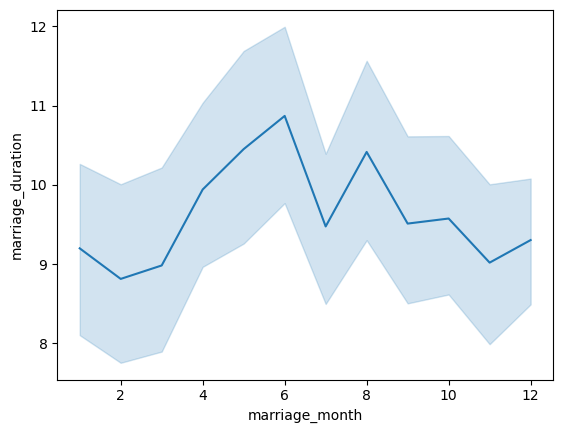

In [14]:
print ( divorce[["marriage_date","marriage_duration"]].head() )

sns.lineplot(data=divorce, x="marriage_month", y="marriage_duration")
plt.show()

# <font color="purple"><b>Let’s Practice. (P4)</b></font>
### <font color="purple"> You'll now work with the entire divorce dataset! The data describes Mexican marriages dissolved between 2000 and 2015. It contains marriage and divorce dates, education level, birthday, income for each partner, and marriage duration, as well as the number of children the couple had at the time of divorce</font>
### <font color="darkred">1.	Import divorce.csv, saving as a DataFrame, divorce; indicate in the import function that the divorce_date, dob_man, and dob_woman, columns should be imported as DateTime values. Check the data types</font>

### <font color=purple><b>Question</b></font>
### <font color=darkred>1. Which of the columns in the <b>divorce</b> DataFrame has not been updated to a DateTime data type but should be? </font>
- ### <font color=darkred>divorce_date</font>
- ### <font color=darkred>marriage_date.</font>
- ### <font color=darkred>education_woman</font>
- ### <font color=darkred>num_kids </font>


In [19]:
divorce.dtypes
#divorce date has not been updated to DateTime data type it is still object 

divorce_date                 object
dob_man                      object
education_man                object
income_man                  float64
dob_woman                    object
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
marriage_month                int32
dtype: object

### <font color=darkred>2.1 Convert the marriage_date column of the divorce DataFrame to DateTime values. Check the data types.</font>

In [50]:
# Convert the marriage_date column to DateTime values
divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])

### 2.2<font color=darkred>Define a column called marriage_year, which contains just the year portion of the marriage_date column.</font>

In [21]:
# Define the marriage_year column
divorce["marriage_year"] = divorce["marriage_date"].dt.year


### 2.3<font color=darkred>Create a line plot showing the average number of kids a couple had during their marriage, arranged by the year that the couple got married </font>

   marriage_year  num_kids
0           2000       1.0
1           2001       NaN
2           2000       2.0
3           2006       NaN
4           2007       NaN


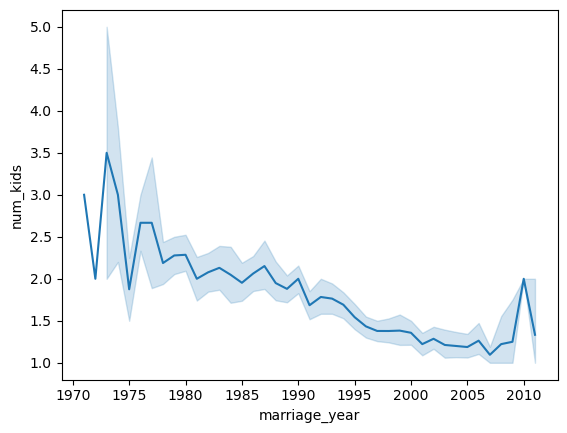

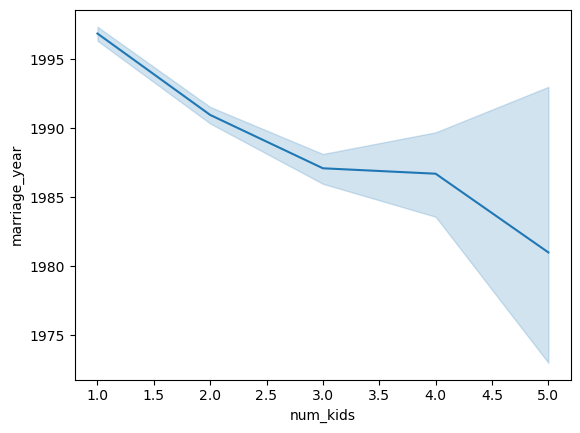

In [25]:
# Create a line plot showing the average number of kids by year
print ( divorce[["marriage_year","num_kids"]].head() )

sns.lineplot(data=divorce, x="marriage_year", y="num_kids")
plt.show()
sns.lineplot(data=divorce, x="num_kids", y="marriage_year")
plt.show()

## <b>Correlation</b>
### Correlation describes the direction of the relationship between two variables as well as its strength. Understanding this relationship can help us use variables to predict future outcomes. A quick way to see the pairwise correlation of numeric columns in a DataFrame is to use pandas' .corr() method.
- ### A negative correlation coefficient indicates that as one variable increases, the other decreases. 
- ### A value closer to zero is indicative of a weak relationship, 
- ### While values closer to one or negative one indicates stronger relationships. 
### The number varies from -1 to 1. For example,
- ### 1 means that there is a 1 to 1 relationship (a perfect correlation), and for this data set, each time a value went up in the first column, the other one went up as well.
- ### 0.9 is also a good relationship, and if you increase one value, the other will probably increase as well.
- ### -0.9 would be just as good relationship as 0.9, but if you increase one value, the other will probably go down.
- ### 0.2 means NOT a good relationship, meaning that if one value goes up does not mean that the other will.
### Note <u>that .corr()</u> calculates the Pearson correlation coefficient, measuring the linear relationship between two variables.


## <b>Correlation</b>
- ### Describes direction and strength of relationship between two variables
- ### Can help us use variables to predict fufture outcomes

In [26]:
divorce[["income_man","income_woman","marriage_duration","num_kids","marriage_year"]]
divorce.select_dtypes(include=np.number).corr()

,income_man,income_woman,marriage_duration,num_kids,marriage_month,marriage_year
income_man,1.000000,0.318047,0.085321,0.040848,0.013652,0.019170
income_woman,0.318047,1.000000,0.078677,-0.018015,0.041441,0.026433
marriage_duration,0.085321,0.078677,1.000000,0.447358,0.001433,-0.812469
num_kids,0.040848,-0.018015,0.447358,1.000000,-0.000551,-0.461495
marriage_month,0.013652,0.041441,0.001433,-0.000551,1.000000,-0.011456
marriage_year,0.019170,0.026433,-0.812469,-0.461495,-0.011456,1.000000


- ### corr() calculates Pearson correlation coeffcient, measuring linear relationship
### Let's wrap our divorce.corr() results in a Seaborn heatmap for quick visual interpretation. A heatmap has the benefit of color coding so that strong positive and negative correlations are easier to spot. Setting <font color=red>the annot argument to True</font> labels the correlation coefficient inside each cell. Here, we can see that marriage year and marriage duration are strongly negatively correlated; in this dataset, marriages in later years are typically shorter.

## <b>Correlation heatmaps<b>

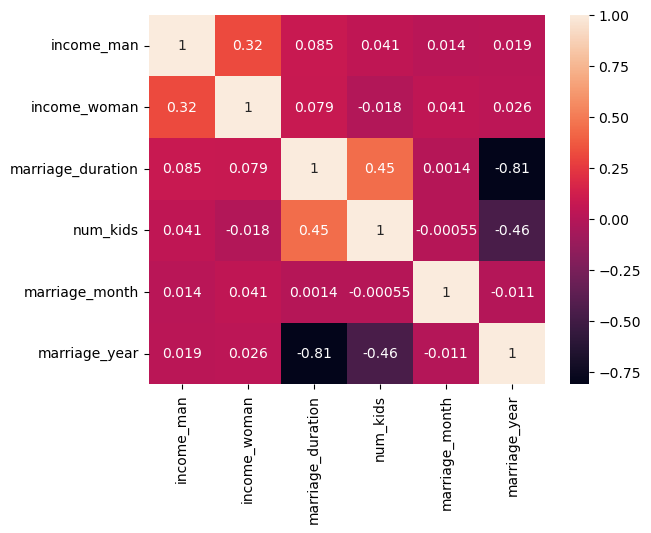

In [27]:
sns.heatmap(divorce.select_dtypes(include=np.number).corr(), annot=True)
plt.show()

## <b>Correlation in context</b>

In [28]:
print ( f"devorce min = {divorce['divorce_date'].min()}")
print ( f"devorce max = {divorce['divorce_date'].max()}")

devorce min = 2000-01-08
devorce max = 2015-11-03


### For example, the monthly income of the female partner and the male partner at the time of divorce showed a correlation coefficient of 0.32 in our heatmap. Let's check that this correctly indicates a small positive relationship between the two variables by passing them as x and y arguments to Seaborn's scatterplot function. It looks like the relationship exists but is not particularly strong, just as our heatmap suggested

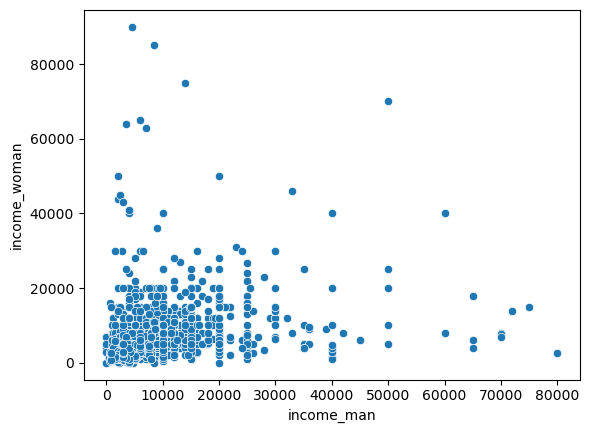

In [29]:
sns.scatterplot(data=divorce, x="income_man",y="income_woman")
plt.show()

### We can take our scatterplots to the next level with Seaborn's pairplot. When passed a DataFrame, pairplot plots all pairwise relationships between numerical variables in one visualization. On the diagonal from upper left to lower right, we see the distribution of each variable's observations. This is useful for a quick overview of relationships within the dataset. However, having this much information in one visual can be difficult to interpret, especially with big datasets which lead to very small plot labels like the ones we see here.

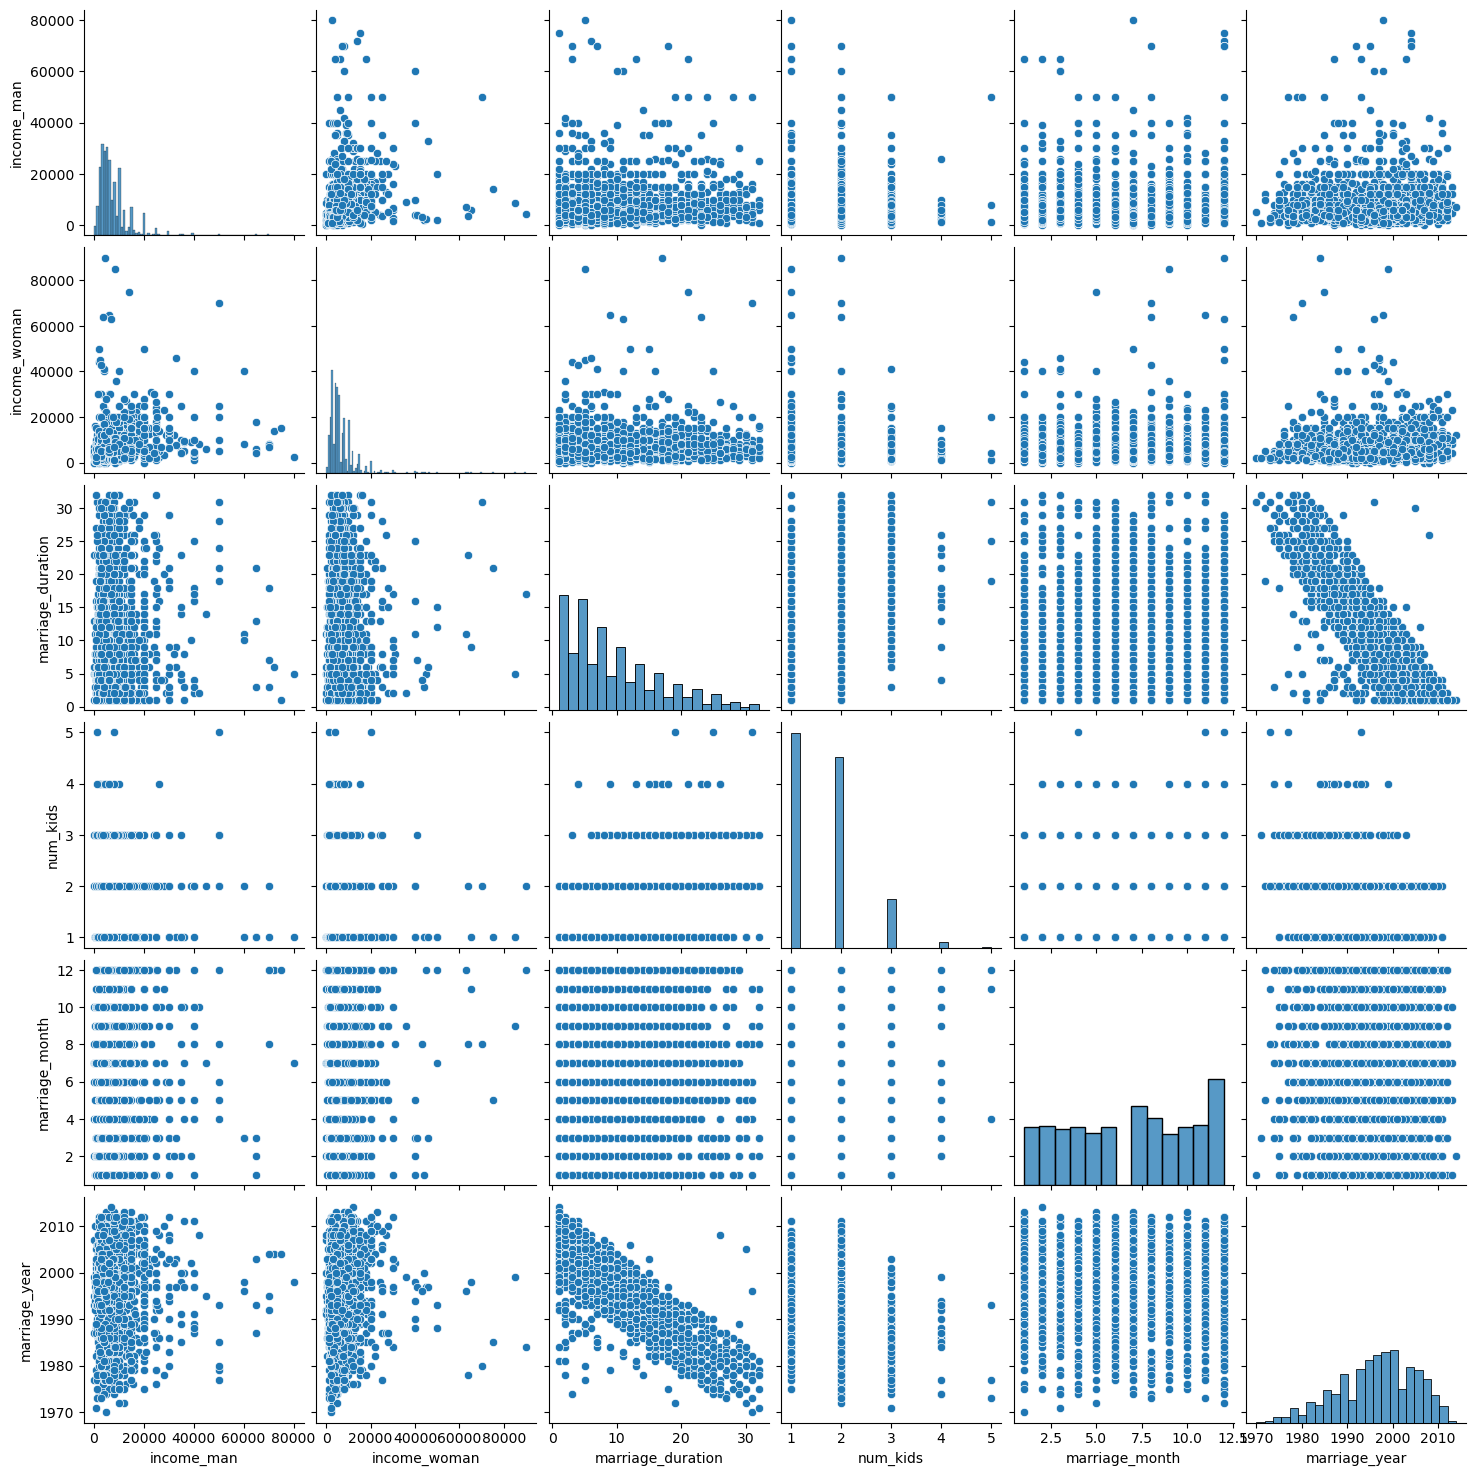

In [30]:
sns.pairplot(data=divorce)
plt.show()

### We can limit the number of plotted relationships by setting the vars argument equal to the variables of interest. This visual reassures us that what our correlation coefficients told us was true: variables representing the income of each partner as well as the marriage duration variable all have fairly weak relationships with each other. We also notice in the lower right plot that the distribution of marriage durations includes many shorter marriages and fewer longer marriages.

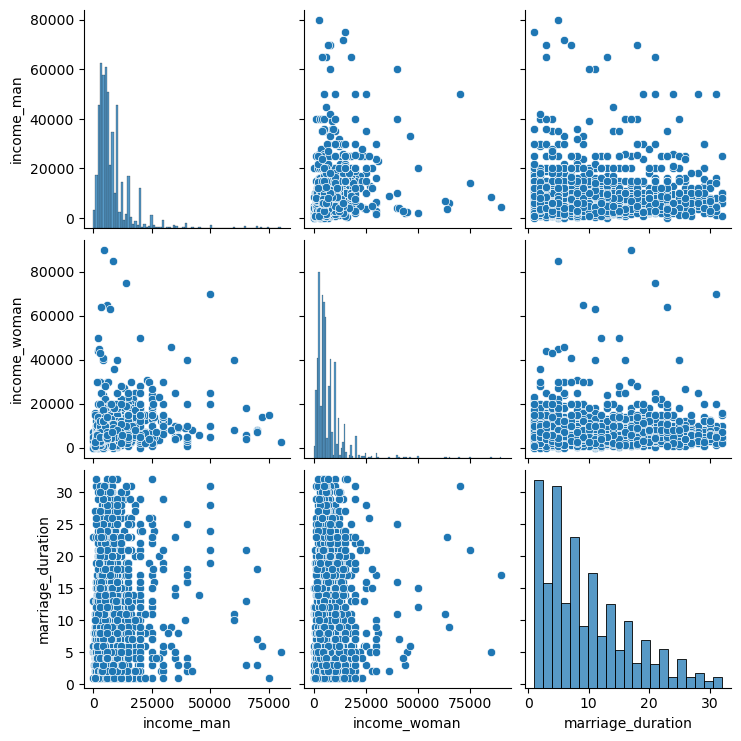

In [31]:
sns.pairplot(data=divorce, vars=["income_man","income_woman","marriage_duration"])
plt.show()

## <font color=purple><b>Let’s Practice (P9) </b></font>
### <font color=purple>According to the following relationships between variables in the divorce DataFrame, which is the possible correct answer?</font>

<Axes: >

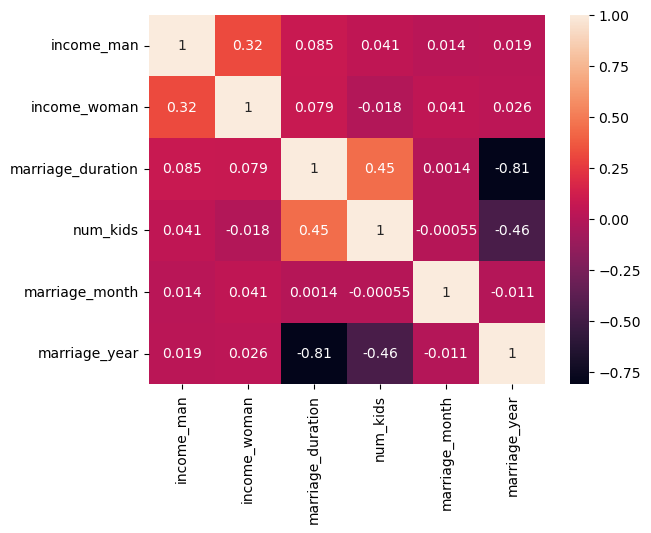

In [32]:
sns.heatmap(divorce.select_dtypes(include=np.number).corr(), annot=True)

- ### <font color=purple>marriage_duration is strongly positively correlated with marriage_month</font>
- ### <font color=purple>The correlation between num_kids and income_man is stronger than the correlation between num_kids and marriage_duration.</font>
- ### <font color=purple>A later marriage_year causes a lower number of children, represented by num_kids.</font>
- ### <font color=purple>A latter marriage_year is correlated with having fewer children.</font>

### <font color=purple>In the last exercise, you may have noticed that a longer marriage_duration is correlated with having more children, represented by the num_kids column. The correlation coefficient between the marriage_duration and num_kids variables is approximately 0.45.</font>


### <font color=darkred>3. Create a scatterplot showing marriage_duration on the x-axis and num_kids on the y-axis.</font>
### <font color=purple>There is a slight positive relationship in your scatterplot. In the dataset, couples with no children have no value in the num_kids column. If you are confident that all or most of the missing values in num_kids are related to couples without children, you could consider updating these values to 0, which might increase the correlation.</font>

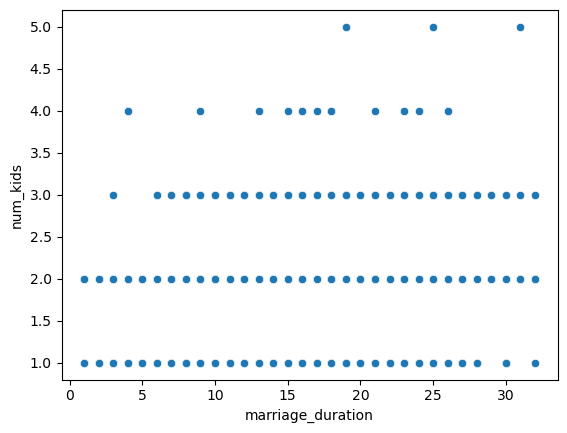

In [33]:
# Create the scatterplot
sns.scatterplot(data=divorce, x="marriage_duration",y="num_kids")
plt.show()

### <font color=darkred>4.	Create a pairplot to visualize the relationships between income_woman and marriage_duration in the divorce DataFrame.</font>
### <font color=purple>you can see that the relationship between income_woman and marriage_duration is not a strong one. You can also get a sense of the distributions of both variables in the upper left and lower right plots.</font>

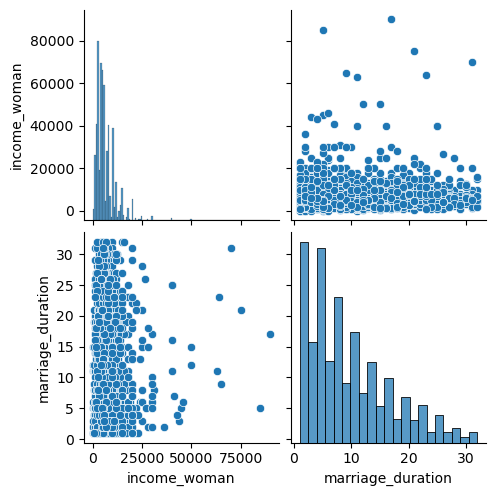

In [34]:
# Create a pairplot for income_woman and marriage_duration
sns.pairplot(data=divorce, vars=["income_woman","marriage_duration"])
plt.show()

## <b>Categorial Relationships</b>
### We haven't explored the categorical variables related to education level yet. Let's do it! Checking the value_counts for education_man, we see that most men have an education level between primary and professional, with a few men in the "None" or "Other" categories.


In [35]:
divorce['education_man'].value_counts()

education_man
Professional    1313
Preparatory      501
Secondary        288
Primary          100
Other              3
Name: count, dtype: int64

### Categorical variables are harder to summarize numerically, so we often rely on visualizations to explore their relationships. Perhaps we are interested in the relationship between marriage duration and the education level of the man in the dissolved marriage. We could begin by making a histogram of the distribution of marriage duration.

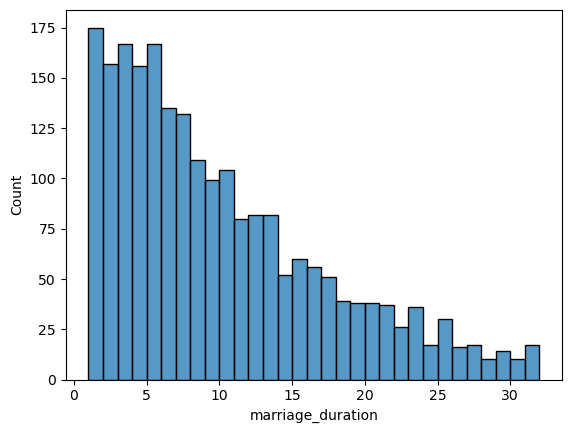

In [36]:
sns.histplot(data=divorce, x="marriage_duration", binwidth=1)
plt.show()

### Then layer in the information we have on male education level by setting education_man as the hue argument. 

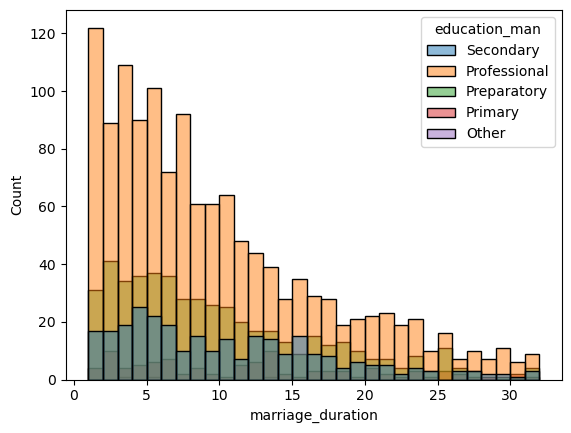

In [37]:
sns.histplot(data=divorce, x="marriage_duration", hue="education_man", binwidth=1)
plt.show()

### However, because the education levels are stacked on top of each other, the relationship between marriage duration and male education level isn't super clear.
## <b>Seaborn KDE Plots (P11)</b>
### Seaborn's Kernel Density Estimate or KDE plots address this issue. Similar to histograms, KDEs allow us to visualize distributions. KDEs are considered more interpretable, though, especially when multiple distributions are shown as they are here. Notice that the location of the peak marriage duration for each level of the male partner's education is more identifiable in this KDE plot than it was in the histogram. However, due to the smoothing algorithm used in KDE plots, the curve can include values that don't make sense, so it's important to set good smoothing parameters.


## <b>Kernel Density Estimate (KDE) plots</b>

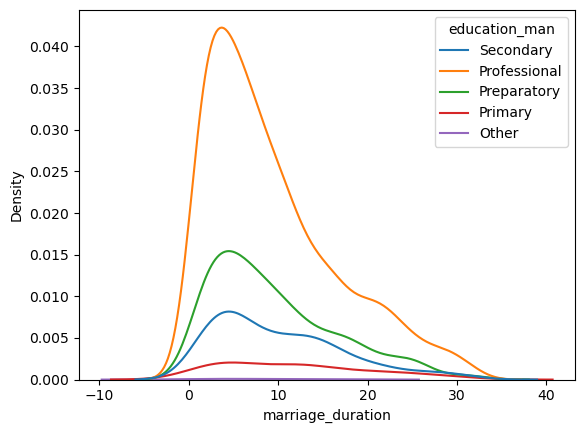

In [38]:
sns.kdeplot(data=divorce, x="marriage_duration", hue="education_man")
plt.show()

### Here's an example: zooming in on the KDE plot showing the distribution of male education levels, we can see that the distribution seems to suggest that some couples had marriage durations of less than zero. That's impossible!

## <b>Kernel Density Estimate (KDE) plots</b>

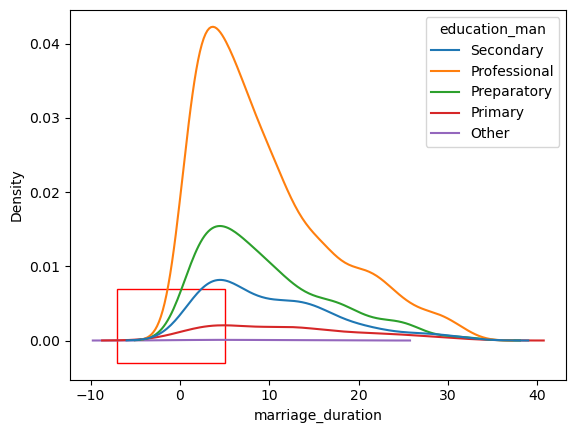

In [39]:
import matplotlib.patches as patches
from matplotlib.patches import Rectangle

fig, ax = plt.subplots()
#ax.plot([0, 0.5],[0, 0.5])

#add rectangle to plot
ax.add_patch(Rectangle((-7, -0.003),12, 0.01, linewidth=1, edgecolor='r', facecolor='none'))

sns.kdeplot(data=divorce, x="marriage_duration", hue="education_man")

plt.show()

### To fix this, we can use the cut keyword argument. cut tells Seaborn how far past the minimum and maximum data values the curve should go when smoothing is applied. When we set cut equal to zero, the curve will be limited to values between the minimum and maximum x values, 

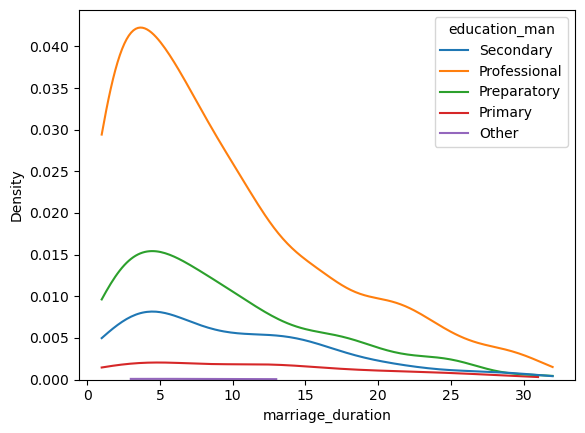

In [40]:
sns.kdeplot(data=divorce, x="marriage_duration", hue="education_man", cut=0 )
plt.show()

### If we're interested in the cumulative distribution function, we can set the cumulative keyword argument to True. This graph describes the probability that marriage duration is less than or equal to the value on the x-axis for each level of male partner education

## <b>Cumulative KDE plots (P12)</b>

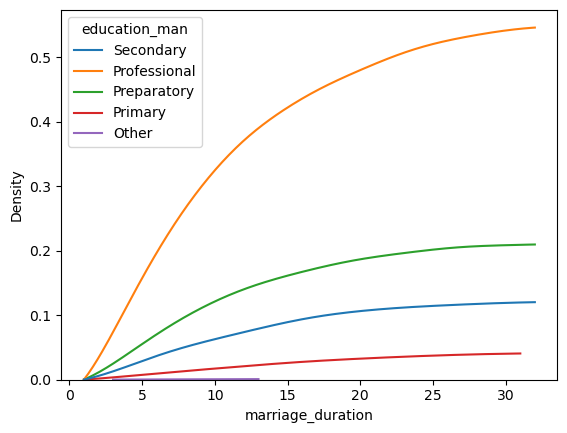

In [41]:
sns.kdeplot(data=divorce, x="marriage_duration", hue="education_man", cut=0 , cumulative=True)
plt.show()

### Perhaps we are interested in whether divorced couples who got married when they were older typically have higher levels of education. We can create columns representing the approximate age at marriage for men and women by subtracting each partner's birth year from the marriage year.

## <b>Relationship bewteen marriage age and education</b>
- ### is there a relationship bewteen age at marriage and education level?

In [42]:
divorce["dob_man"] = pd.to_datetime(divorce["dob_man"])
divorce["dob_woman"] = pd.to_datetime(divorce["dob_woman"])
divorce["man_age_marriage"]= divorce["marriage_year"] - divorce["dob_man"].dt.year
divorce["woman_age_marriage"]= divorce["marriage_year"] - divorce["dob_woman"].dt.year


### Then, we create a scatterplot using these variables on the x and y-axis. It looks like there is a positive correlation between them! 

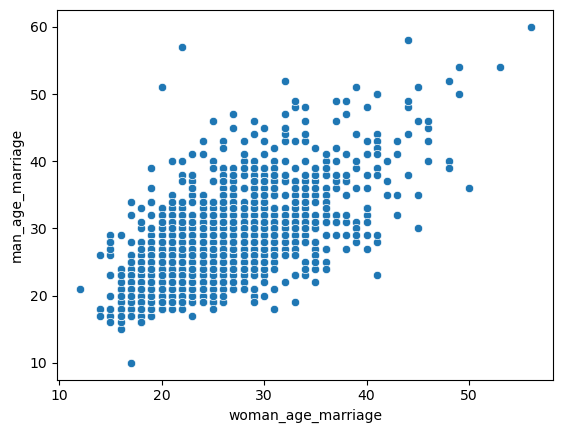

In [43]:
sns.scatterplot(data=divorce, x="woman_age_marriage", y="man_age_marriage")
plt.show()

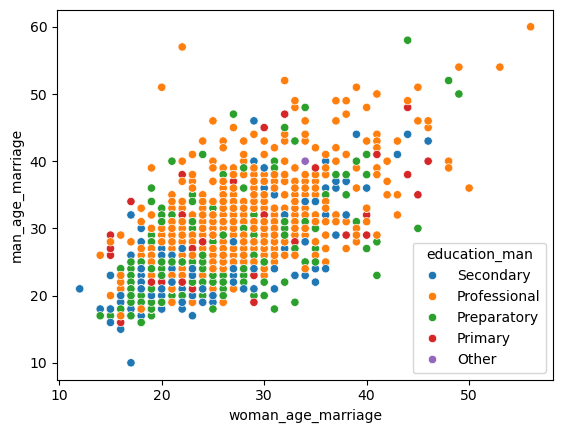

In [44]:
sns.scatterplot(data=divorce, x="woman_age_marriage", y="man_age_marriage",hue="education_man")
plt.show()

### <font color=red>The results suggest that men with a professional education level, represented with orange dots, may tend to get married later</font>

# <font color=purple><b>Let’s Practice. (P14)</b></font>

### <font color=darkred>5. Create a scatter plot that shows woman_age_marriage on the x-axis and income_woman on the y-axis; each data point should be colored based on the woman's level of education, represented by education_woman.</font>

#### Note: From the graph, it looks like there is a positive correlation between professional education and higher salaries, as you might expect. The relationship between women's age at marriage and education level is a little less clear.

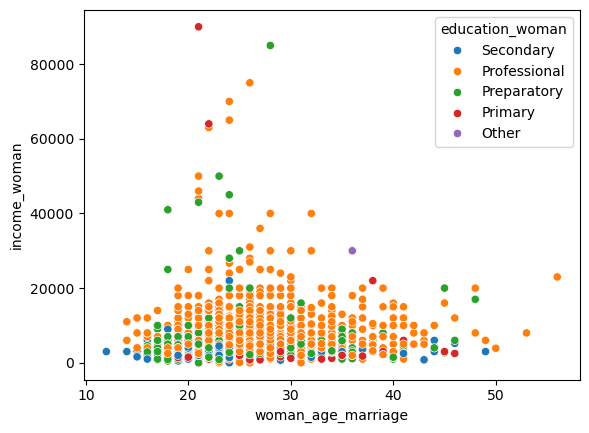

In [46]:
# Create the scatter plot
sns.scatterplot(data=divorce, x="woman_age_marriage", y="income_woman",hue="education_woman")
plt.show()

### <font color=darkred>6.	Create a KDE plot that shows <b>marriage_duration</b> on the x-axis and a different colored line for each possible number of children that a couple might have, represented by <b>num_kids</b>.</font>
### <font color=darkred> Notice that the plot currently shows marriage durations less than zero; update the KDE plot so that marriage duration cannot be smoothed past the extreme data points.</font>
### <font color=darkred> Update the code for the KDE plot from the previous step to show a cumulative distribution function for each number of children a couple has.</font>


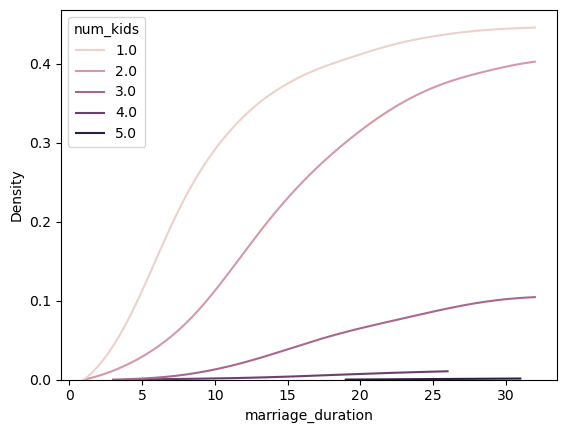

In [47]:
# Create the KDE plot
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0 , cumulative=True)
plt.show()

### Note: It looks as though there is a positive correlation between longer marriages and more children, but of course, this doesn't indicate causation. You can also see that there is much less data on couples with more than two children; this helps us understand how reliable our findings are.

## <b>Considerations for Categorial Data</b>
###  Let's see how we convert exploratory data analysis into action! We'll start by looking at class frequencies.
### Recall that EDA is performed for a variety of reasons, like 
- ### detecting patterns and relationships in data, 
- ### generating questions or hypotheses, or 
- ### preparing data for machine learning models.


## <b>Representative data </b>
- ### sample represents the population 
<b>For example</b>
- ### Sample represents tje population 
For example:
- ### Education versus income in USA 
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Can't use data from Framce
### With categorical data, one of the most important considerations is about the representation of classes, which is another term for labels. For example, say we collect data on people's attitudes to marriage. As part of our data <u>collection</u> we find out their marital status, with the classes including single, married, and divorced.

Categorical classes
- ### Classes = labels
- ### Survey people's attributes towards marriage
### &nbsp;&nbsp;&nbsp; = Marital status
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Single
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Married
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Devoced
### When we perform <u>EDA</u> we realize only 50 people were married, while 700 were divorced and the remaining 250 were single. Do we think that this sample accurately represents the general public's opinion about marriage? Are divorced people more likely to have a negative view towards marriage? This is an example of class imbalance, where one class occurs more frequently than others. This can bias results, particularly if this class does not occur more frequently in the population.

## <b>Class imbalance </b>

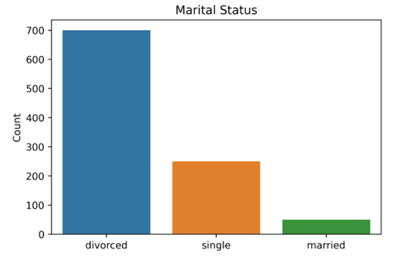

## <b>Class Frequency</b>
### Say that we know 40 percent of internal Indian flights go to Delhi. We can use value_counts method again, but this time set the normalize keyword argument equal to True. This returns the relative frequencies for each class, showing that Delhi only represents 11.82 percent of destinations in our dataset. <font color=red>Again, this could suggest that our data is not representative of the population - in this case, internal flights in India.</font>


In [49]:
planes = pd.read_csv('Airlines_unclean.csv')
print(planes["Destination"].value_counts())

Destination
Cochin       4391
Banglore     2773
Delhi        1219
New Delhi     888
Hyderabad     673
Kolkata       369
Name: count, dtype: int64


## <b>Relative class frequency </b>
- ### 40% of internal indian flights have a destination of Delho


In [50]:
print(planes["Destination"].value_counts(normalize=True))

Destination
Cochin       0.425773
Banglore     0.268884
Delhi        0.118200
New Delhi    0.086105
Hyderabad    0.065257
Kolkata      0.035780
Name: proportion, dtype: float64


- ### is our sample representative of the population (Indian internal flight) ?

## <b>Cross-tabulation</b>
### Another method for looking at class frequency is cross-tabulation, which enables us to examine the frequency of combinations of classes. Let's look at flight route frequencies. We'll start by calling pandas-dot-crosstab function.


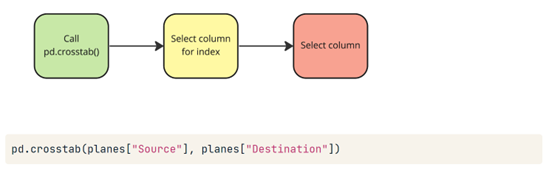

In [51]:
pd.crosstab(planes["Source"], planes["Destination"])


Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,1199,0,0,868
Chennai,0,0,0,0,364,0
Delhi,0,4318,0,0,0,0
Kolkata,2720,0,0,0,0,0
Mumbai,0,0,0,662,0,0


#### We see the most popular route is from Delhi to Cochin, making up 4318 flights.

#### Say we know the median price for all internal flight routes in India. Here they are for the routes in our dataset, measured in Indian Rupees. We can calculate the median price for these routes in our DataFrame, and compare the difference to these expected values.


## <b>Extending cross-tabulation</b>

In [52]:
#planes[["Source","Destination","Price"]].groupby(["Source","Destination"]).agg( Median_Price_IDR =('Price','median') ).reset_index()

ex = {"Source": ["Banglore","Banglore","Chennai","Delhi","Kolkata","Mumbai"],
     "Destination": ["Delhi","New Delhi","Kolkata","Cochin","Banglore","Hyderabad"], 
     "Price Median IDR":["4232.21","12114.56","3859.76","987.63","5654.21","3431.97"] }
expected = pd.DataFrame(data=ex)
expected


,Source,Destination,Price Median IDR
0,Banglore,Delhi,4232.21
1,Banglore,New Delhi,12114.56
2,Chennai,Kolkata,3859.76
3,Delhi,Cochin,987.63
4,Kolkata,Banglore,5654.21
5,Mumbai,Hyderabad,3431.97


### We do this by adding two keyword arguments to pd.crosstab(). We pass the Price column to the values argument, and use aggfunc to select what aggregated calculation we want to perform. We can pass a summary statistic as a string, in this case setting it equal to median. The results show median values for all possible routes in the dataset.


## <b>Aggregate values with pd.crosstab()</b>
### <font color=blue>pd.crosstab(planes["Source"], planes["Destination"], </font>

In [53]:
pd.crosstab(planes["Source"], planes["Destination"], values=planes["Price"], aggfunc="median")

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,NaN,NaN,4823.0,NaN,NaN,10976.5
Chennai,NaN,NaN,NaN,NaN,3850.0,NaN
Delhi,NaN,10262.0,NaN,NaN,NaN,NaN
Kolkata,9345.0,NaN,NaN,NaN,NaN,NaN
Mumbai,NaN,NaN,NaN,3342.0,NaN,NaN


## <b> Comparing sample to population </b>


In [54]:
planes_median = planes[["Source","Destination","Price"]].groupby(["Source","Destination"]).agg( Median_Price_dataset =('Price','median') ).reset_index()
planes_median["Price Median IDR"] = expected["Price Median IDR"]
planes_median

,Source,Destination,Median_Price_dataset,Price Median IDR
0,Banglore,Delhi,4823.0,4232.21
1,Banglore,New Delhi,10976.5,12114.56
2,Chennai,Kolkata,3850.0,3859.76
3,Delhi,Cochin,10262.0,987.63
4,Kolkata,Banglore,9345.0,5654.21
5,Mumbai,Hyderabad,3342.0,3431.97


### <font color=red> Comparing our prices with the expected values, most are similar. However, routes from Banglore to Delhi and New Delhi are significantly different (more expensive and less expensive) in the dataset, suggesting they aren't representative of the population.</font>

# <font color=purple>Let’s Practice. (20) </font>
### <font color=purple><b>Checking for class imbalance</b></font>
### <font color=purple>The 2022 Kaggle Survey captures information about data scientists' backgrounds, preferred technologies, and techniques. It is seen as an accurate view of what is happening in data science based on the volume and profile of responders.</font>
### <font color=purple>Having looked at the job titles and categorized to align with our salaries DataFrame, you can see the following proportion of job categories in the Kaggle survey: </font>


In [55]:
d2 = {
    "Job Category" : ["Data Science","Data Analytics","Other","Managerial","Machone Learning","Data Engineer"],
    "Relative Frequency" : [0.281236,0.224231,0.214609,0.121300,0.083248,0.075375]
}
survey = pd.DataFrame(data=ex)
survey

,Source,Destination,Price Median IDR
0,Banglore,Delhi,4232.21
1,Banglore,New Delhi,12114.56
2,Chennai,Kolkata,3859.76
3,Delhi,Cochin,987.63
4,Kolkata,Banglore,5654.21
5,Mumbai,Hyderabad,3431.97


### <font color=purple>Load Salary_Rupee_USD.csv to salaries with index_col = 0 </font?


In [56]:
salaries = pd.read_csv('Salary_Rupee_USD.csv', index_col = 0)
print(salaries.info())

<class 'pandas.core.frame.DataFrame'>
Index: 407 entries, 0 to 406
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          407 non-null    int64  
 1   Designation           407 non-null    object 
 2   Experience            407 non-null    object 
 3   Employment_Status     407 non-null    object 
 4   Salary_In_Rupees      407 non-null    float64
 5   Employee_Location     407 non-null    object 
 6   Company_Location      407 non-null    object 
 7   Company_Size          407 non-null    object 
 8   Remote_Working_Ratio  407 non-null    int64  
 9   Salary_USD            407 non-null    float64
 10  Job_Category          407 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 38.2+ KB
None


### <font color=darkred>7.	Print the relative frequency of the "Job_Category" column from salaries DataFrame.</font>


In [83]:
relative_frequencies = salaries['Job_Category'].value_counts(normalize=True)
print(relative_frequencies)

Job_Category
Data Science        0.277641
Data Engineering    0.272727
Data Analytics      0.226044
Machine Learning    0.120393
Other               0.068796
Managerial          0.034398
Name: proportion, dtype: float64


In [ ]:
salaries

### <b>Note</b>: It looks like Data Science is the most popular class and has a similar representation. Still, the other categories have quite different relative frequencies, which might not be surprising given the target audience is data scientists! Given the difference in relative frequencies, can you trust the salaries DataFrame to accurately represent Managerial roles?

# <b>Cross-tabulation</b>
### Cross-tabulation can help identify how observations occur in combination.
### Using the <u>salaries</u> dataset, you'll perform cross-tabulation on multiple variables, including the use of aggregation, to see the relationship between <u>"Company_Size"</u> and other variables.
### <font color=darkred>8.1	Perform cross-tabulation, setting "Company_Size" as the index, and the columns to classes in "Experience". </font>


In [79]:
# Cross-tabulate Company_Size and Experience
pd.crosstab(salaries["Company_Size"],salaries["Experience"])

Experience,EN,EX,MI,SE
Company_Size,,,,
L,24,7,49,44
M,25,9,58,136
S,18,1,21,15


### <font color=darkred>8.2 Perform cross-tabulate "Job_Category" and classes of "Company_Size" as column names.</font>


In [80]:
# Cross-tabulate Job_Category and Company_Size
pd.crosstab(salaries["Job_Category"],salaries["Company_Size"])

Company_Size,L,M,S
Job_Category,,,
Data Analytics,23,61,8
Data Engineering,28,72,11
Data Science,38,59,16
Machine Learning,17,19,13
Managerial,5,8,1
Other,13,9,6


### <font color=darkred>8.3Update pd.crosstab() to return the mean "Salary_USD" values.</font>


In [82]:
# Cross-tabulate Job_Category and Company_Size
pd.crosstab(salaries["Job_Category"],salaries["Company_Size"],values=salaries["Salary_USD"],aggfunc="mean")

Company_Size,L,M,S
Job_Category,,,
Data Analytics,112851.749217,95912.685246,53741.877000
Data Engineering,118939.035000,121287.060500,86927.136000
Data Science,96489.520105,116044.455864,62241.749250
Machine Learning,140779.491529,100794.236842,78812.586462
Managerial,190551.448800,150713.628000,31484.700000
Other,92873.911385,89750.578667,69871.248000


### Note: Looks like the largest mean salary is for Managerial data roles in large companies!


# <b> Generating New Features. </b>
### Sometimes the format of our data can limit our ability to detect relationships or inhibit the potential performance of machine learning models. One method to overcome these issues is to generate new features from our data!
### Checking correlation with a heatmap, we see a moderate positive correlation between Price and Duration, but it looks like those are the only numeric variables in our dataset.


## <b>Correlation</b>

<class 'pandas.core.frame.DataFrame'>
Index: 10660 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10233 non-null  object 
 1   Date_of_Journey  10338 non-null  object 
 2   Source           10473 non-null  object 
 3   Destination      10313 non-null  object 
 4   Route            10404 non-null  object 
 5   Dep_Time         10400 non-null  object 
 6   Arrival_Time     10466 non-null  object 
 7   Duration         10446 non-null  float64
 8   Total_Stops      10448 non-null  object 
 9   Additional_Info  10071 non-null  object 
 10  Price            10044 non-null  float64
dtypes: float64(2), object(9)
memory usage: 999.4+ KB
None


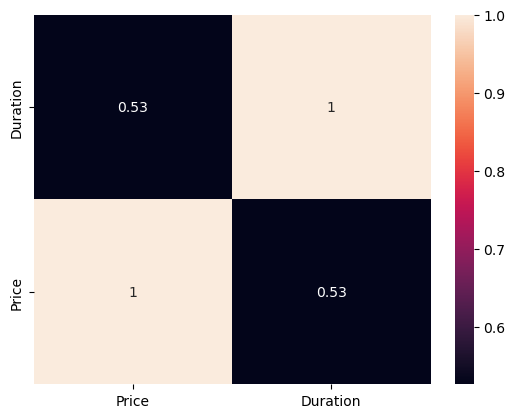

In [59]:
planes = pd.read_csv('Airlines_unclean.csv', index_col = 0, )

# Remove the string character
planes["Duration"] = planes["Duration"].str.replace("h", ".")
planes["Duration"] = planes["Duration"].str.replace("m", "")
planes["Duration"] = planes["Duration"].str.replace(" ", "")
# Convert to float data type
planes["Duration"] = planes["Duration"].astype(float)
print(planes.info())
planes[["Price","Duration"]].corr()
ax = sns.heatmap(planes[["Price","Duration"]].corr(), annot=True)
ax.set_ylim([0,2])
plt.show()


### Viewing the data types confirms this is the case. However, Total_Stops should also be numeric. Viewing the value_counts, we see need to remove string characters.

In [60]:
#remove Nan values
threshold = len(planes) * 0.05
print(threshold)
# Count the number of missing values in each column
print('====Check Missing data =====================')
print(planes.isna().sum())
print('============================================')

# Find the five percent threshold
threshold = len(planes) * 0.05

# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

print('====Check Missing data After drop missing ==')
print(planes.isna().sum())
print('============================================')

#planes = planes.drop(columns = ['Additional_Info'])

# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()
print('====Calculate median prices by Airline =====')
print(airline_prices)
print('============================================')

# Convert to a dictionary
prices_dict = airline_prices.to_dict()
print('====== Airline dictionary data type ========')
print(prices_dict)
print('============================================')

# Map the dictionary to missing values of Price by Airline
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

# Check for missing values
print('====== Check Missing data ==================')
print(planes.isna().sum())
print('============================================')


533.0
====Check Missing data =====================
Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64
====Check Missing data After drop missing ==
Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64
====Calculate median prices by Airline =====
Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64
====== Airline dictionary data type ========
{'Air Asia': 5

## <b>Total Stop </b>

In [61]:
print(planes['Total_Stops'].head(10))
print(planes['Total_Stops'].value_counts())


0     2 stops
1      1 stop
2      1 stop
3    non-stop
4      1 stop
5      1 stop
6      1 stop
7      1 stop
8      1 stop
9    non-stop
Name: Total_Stops, dtype: object
Total_Stops
1 stop      4467
non-stop    2786
2 stops     1219
3 stops       35
4 stops        1
Name: count, dtype: int64


### We use the string-dot-replace method to first remove " stops", including the space, so that flights with two, three, or four stops are ready to convert. Next, we clean flights with one stop. Lastly, we change "non-stop" to "0", then set the data type to integer.

## <b>Cleaning total stops</b>

In [62]:
planes['Total_Stops'] = planes['Total_Stops'].str.replace(' stops', '')
planes['Total_Stops'] = planes['Total_Stops'].str.replace(' stop', '')
planes['Total_Stops'] = planes['Total_Stops'].str.replace('non-stop', '0')
planes['Total_Stops'] = planes['Total_Stops'].str.replace(' ', '')
planes['Total_Stops'] = planes['Total_Stops'].astype(int)
print(planes.head())

       Airline Date_of_Journey    Source Destination                  Route  \
0  Jet Airways        9/6/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
1       IndiGo       12/5/2019   Kolkata    Banglore        CCU → NAG → BLR   
2       IndiGo        1/3/2019  Banglore   New Delhi        BLR → NAG → DEL   
3     SpiceJet       24/6/2019   Kolkata    Banglore              CCU → BLR   
4  Jet Airways       12/3/2019  Banglore   New Delhi        BLR → BOM → DEL   

  Dep_Time     Arrival_Time  Duration  Total_Stops  \
0     9:25   10/6/2023 4:25     19.00            2   
1    18:05            23:30      5.25            1   
2    16:50            21:35      4.45            1   
3     9:00            11:25      2.25            0   
4    18:55  13/3/2023 10:25     15.30            1   

               Additional_Info    Price  
0                      No info  13882.0  
1                      No info   6218.0  
2                      No info  13302.0  
3                      No info  

## <b> Correlation </b>

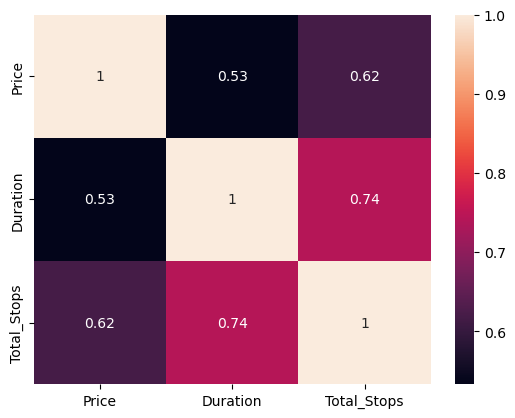

In [63]:
sns.heatmap(planes[["Price","Duration","Total_Stops"]].corr(), annot=True)
plt.show()

### Unsurprisingly, Total_Stops is strongly correlated with Duration. What is interesting is that Total_Stops and Price are more strongly correlated than Duration is with Price! Let's see what else we can find out!
### Rechecking our data types, notice that there are three datetime variables - Date_of_Journey, Dep_Time, and Arrival_Time.


# <b>Date<b>

In [64]:
print( planes.dtypes )

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration           float64
Total_Stops          int64
Additional_Info     object
Price              float64
dtype: object


### <b>Extracting Months and Weekdays</b>
### We know how to extract attributes from datetime values, so we can see if these offer any insights into pricing. To start, let's look at Date_of_Journey. If we think prices vary per month, it's worth using this attribute - we create it as a column in our DataFrame. Perhaps prices might also differ depending on the day of the week? Let's grab that using the dt.weekday attribute. It returns values of zero, representing Monday, through to seven, for Sunday. Previewing these columns we see the first flight, departing on the 6th September, was a Friday, indicated by a four.


In [65]:
planes["Date_of_Journey"] = pd.to_datetime(planes["Date_of_Journey"], format='%d/%m/%Y' )
planes["month"] = planes["Date_of_Journey"].dt.month
planes["weekday"] = planes["Date_of_Journey"].dt.weekday
print ( planes[["month","weekday","Date_of_Journey"]].head())

   month  weekday Date_of_Journey
0      6        6      2019-06-09
1      5        6      2019-05-12
2      3        4      2019-03-01
3      6        0      2019-06-24
4      3        1      2019-03-12


### We might wonder if people tend to pay more to depart or arrive at more convenient times. We extract the hour of departure and arrival from those respective columns too.

## <b>Departure and arrival times</b>

In [ ]:
planes["Dep_Hour"] = planes["Dep_Time"].dt.hour
planes["Arrival_Hour"] = planes["Arrival_Time"].dt.hour

In [67]:


planes['Dep_Time2'] = planes['Dep_Time'].str.replace(r'[*] ', '', regex=True)
planes['Arrival_Time2'] = planes['Arrival_Time'].str.replace(r'^\d*/\d*/\d* ', '', regex=True)


planes["Dep_Hour"] = pd.to_datetime(planes["Dep_Time2"], format='%H:%M' ).dt.hour
planes["Arrival_Hour"] = pd.to_datetime(planes["Arrival_Time2"], format='%H:%M' ).dt.hour

print (planes)

           Airline Date_of_Journey    Source Destination  \
0      Jet Airways      2019-06-09     Delhi      Cochin   
1           IndiGo      2019-05-12   Kolkata    Banglore   
2           IndiGo      2019-03-01  Banglore   New Delhi   
3         SpiceJet      2019-06-24   Kolkata    Banglore   
4      Jet Airways      2019-03-12  Banglore   New Delhi   
...            ...             ...       ...         ...   
10654     SpiceJet      2019-05-21  Banglore       Delhi   
10655     Air Asia      2019-04-09   Kolkata    Banglore   
10656    Air India      2019-04-27   Kolkata    Banglore   
10658      Vistara      2019-03-01  Banglore   New Delhi   
10659    Air India      2019-05-09     Delhi      Cochin   

                       Route Dep_Time     Arrival_Time  Duration  Total_Stops  \
0      DEL → LKO → BOM → COK     9:25   10/6/2023 4:25     19.00            2   
1            CCU → NAG → BLR    18:05            23:30      5.25            1   
2            BLR → NAG → DEL    16:5

### Because they are numeric, we can calculate correlation between these new datetime features and other variables. Re-plotting our heatmap, unfortunately there aren't any new strong relationships. <font color=red>But we wouldn't have known this if we hadn't generated these features.</font>
## <b> Correlation </b>

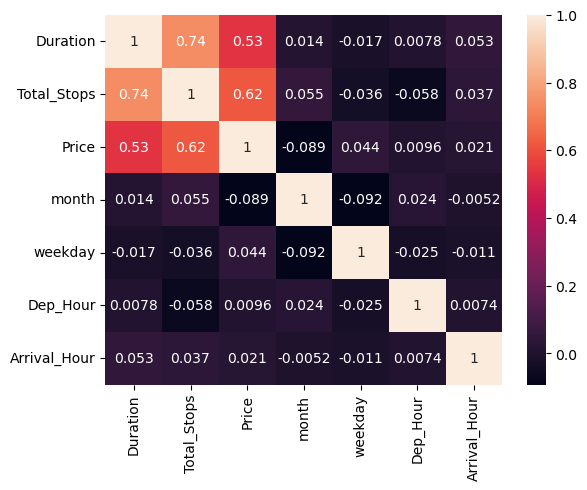

In [69]:
sns.heatmap(planes[["Duration","Total_Stops","Price","month","weekday","Dep_Hour","Arrival_Hour"]].corr(), annot=True)
plt.show()

## <b>Another technique to generate new features. </b>
### There's one more technique we can use to generate new features. We can group numeric data and label them as classes. For example, we don't have a column for ticket type. We could use descriptive statistics to label flights as economy, premium economy, business class, or first class, based on prices within specific ranges, or bins.


## <b>Creating Categories</b>


In [70]:
print (planes["Price"].describe())
tickets_json = { "Range" : ["<= 5228","5228 - 8335","8335 - 12373",">12373"], "Ticket type" : ["Economy","Permium Economy","Business Class","First Class"] }
tickets = pd.DataFrame(data=tickets_json)
tickets

count     8508.000000
mean      9033.468441
std       4366.382574
min       1759.000000
25%       5228.000000
50%       8452.000000
75%      12242.000000
max      54826.000000
Name: Price, dtype: float64


,Range,Ticket type
0,<= 5228,Economy
1,5228 - 8335,Permium Economy
2,8335 - 12373,Business Class
3,>12373,First Class


### We'll split equally across the price range using quartiles. We first store the 25th percentile using the quantile method. We get the 50th percentile by calling the median. Next we get the 75th percentile, and lastly, we store the maximum value.
## <b> Descriptive statistics</b>

In [71]:
twenty_fifth = planes["Price"].quantile(0.25)
median = planes["Price"].median()
seventy_fifth = planes["Price"].quantile(0.75)
maximum = planes["Price"].max()

### Then create labels. Next, we create the bins, a list starting from zero and including our descriptive statistic variables.
## <b>Labels and bins </b>

In [72]:
a_labels = ["Economy","Permium Economy","Business Class","First Class"]
a_bins = [0, twenty_fifth, median, seventy_fifth, maximum ]

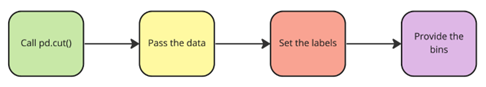

In [73]:

planes['Price_Category'] = pd.cut(planes['Price'], labels=a_labels,bins=a_bins)
print(planes[['Price', 'Price_Category']].head())

     Price   Price_Category
0  13882.0      First Class
1   6218.0  Permium Economy
2  13302.0      First Class
3   3873.0          Economy
4  11087.0   Business Class


In [ ]:
planes

In [74]:
planes["Price_Category"] = pd.cut(planes["Price"], labels=a_labels,bins=a_bins )

In [75]:
print ( planes[["Price","Price_Category"]].head() )

     Price   Price_Category
0  13882.0      First Class
1   6218.0  Permium Economy
2  13302.0      First Class
3   3873.0          Economy
4  11087.0   Business Class


### We can plot the count of flights in different categories per airline by passing our new column to the hue argument when calling sns.countplot.

## <b>Price category by airline</b>

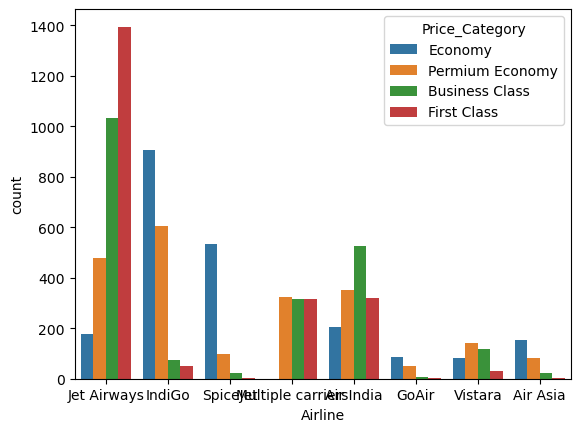

In [76]:
sns.countplot(data=planes, x="Airline", hue="Price_Category")
plt.show()

### Looks like Jet Airways has the largest number of "First Class" tickets, while most of IndiGo and SpiceJet's flights are "Economy".
### Let’s practice with salaries DataFrame. Load the Salaries_with_date_of_response.csv to salaries, with index_col = 0 and parse_date = [‘date_of_response’]
### Your task is to extract datetime attributes from this column and then create a heat map to visualize the correlation coefficients between variables.


In [77]:
salaries = pd.read_csv('Salaries_with_date_of_response.csv', index_col = 0, parse_dates=['date_of_response'])
print(salaries.info())
salaries["date_of_response"] = pd.to_datetime( salaries["date_of_response"], format='%d/%m/%Y' )


<class 'pandas.core.frame.DataFrame'>
Index: 407 entries, 0 to 406
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Designation           407 non-null    object 
 1   date_of_response      407 non-null    object 
 2   Experience            407 non-null    object 
 3   Employment_Status     407 non-null    object 
 4   Salary_In_Rupees      407 non-null    float64
 5   Employee_Location     407 non-null    object 
 6   Company_Location      407 non-null    object 
 7   Company_Size          407 non-null    object 
 8   Remote_Working_Ratio  407 non-null    int64  
 9   Salary_USD            407 non-null    float64
 10  Job_Category          407 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 38.2+ KB
None


### <font color=darkred> 9.	Extract the month from "date_of_response", storing it as a column called "month".</font>

In [86]:
# Get the month of the response
salaries["month"] = salaries["date_of_response"].dt.month
salaries

,Designation,date_of_response,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio,Salary_USD,Job_Category,month
0,Machine Learning Scientist,2020-01-07,SE,FT,20700000.0,JP,JP,S,0,248256.840,Machine Learning,1
1,Big Data Engineer,2020-09-19,SE,FT,8680000.0,GB,GB,M,50,104099.820,Data Engineering,9
2,Product Data Analyst,2020-11-21,MI,FT,1590000.0,HN,HN,S,0,19096.680,Data Analytics,11
3,Machine Learning Engineer,2020-11-29,SE,FT,11900000.0,US,US,L,50,143225.100,Machine Learning,11
4,Data Analyst,2020-09-07,EN,FT,5730000.0,US,US,L,100,68748.048,Data Analytics,9
...,...,...,...,...,...,...,...,...,...,...,...,...
402,Data Engineer,2022-10-27,SE,FT,12300000.0,US,US,M,100,147044.436,Data Engineering,10
403,Data Engineer,2022-08-25,SE,FT,10000000.0,US,US,M,100,120309.084,Data Engineering,8
404,Data Analyst,2022-08-11,SE,FT,10300000.0,US,US,M,0,123173.592,Data Analytics,8
405,Data Analyst,2022-06-15,SE,FT,11900000.0,US,US,M,100,143225.100,Data Analytics,6


### <font color=darkred>Create the "weekday" column, containing the weekday that the participants completed the survey.</font>

In [88]:
# Extract the weekday of the response
salaries["weekday"] = salaries["date_of_response"].dt.weekday
salaries

,Designation,date_of_response,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio,Salary_USD,Job_Category,month,weekday
0,Machine Learning Scientist,2020-01-07,SE,FT,20700000.0,JP,JP,S,0,248256.840,Machine Learning,1,1
1,Big Data Engineer,2020-09-19,SE,FT,8680000.0,GB,GB,M,50,104099.820,Data Engineering,9,5
2,Product Data Analyst,2020-11-21,MI,FT,1590000.0,HN,HN,S,0,19096.680,Data Analytics,11,5
3,Machine Learning Engineer,2020-11-29,SE,FT,11900000.0,US,US,L,50,143225.100,Machine Learning,11,6
4,Data Analyst,2020-09-07,EN,FT,5730000.0,US,US,L,100,68748.048,Data Analytics,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,Data Engineer,2022-10-27,SE,FT,12300000.0,US,US,M,100,147044.436,Data Engineering,10,3
403,Data Engineer,2022-08-25,SE,FT,10000000.0,US,US,M,100,120309.084,Data Engineering,8,3
404,Data Analyst,2022-08-11,SE,FT,10300000.0,US,US,M,0,123173.592,Data Analytics,8,3
405,Data Analyst,2022-06-15,SE,FT,11900000.0,US,US,M,100,143225.100,Data Analytics,6,2


### <font color=darkred>Plot a heat map, including the Pearson correlation coefficient scores. </font>

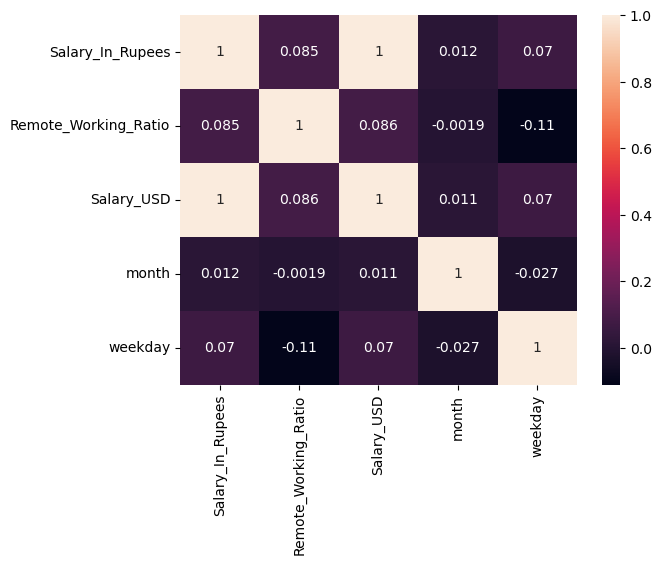

In [89]:
# Create a heatmap
sns.heatmap(salaries.select_dtypes(include=np.number).corr(), annot=True)
plt.show()

### Your next task is to convert the "Salary_USD" column into categories based on its percentiles. First, you need to find the percentiles and store them as variables.

### <font color=darkred> 10. Find the 25th percentile of "Salary_USD". </font>

In [123]:
# Find the 25th percentile
salary_twenty_fifth = salaries["Salary_USD"].quantile(0.25)
print(salary_twenty_fifth)


60880.691999999995


### <font color=darkred>Store the median of "Salary_USD" as salaries_median. </font>

In [124]:
# Save the median
salaries_median = salaries[["Salary_USD"]].median()
print(salaries_median)


Salary_USD    97488.552
dtype: float64


### <font color=darkred>Get the 75th percentile of salaries. </font>

In [125]:
# Gather the 75th percentile
salary_seventy_fifth = salaries["Salary_USD"].quantile(0.75)
print(salary_seventy_fifth)


143225.1


### <font color=darkred>Create salary_labels, a list containing "entry", "mid", "senior", and "exec". </font>

In [126]:
# Create salary labels
salary_labels = ["Entry", "Mid", "Senior", "Exec"]

### <font color=darkred>Finish salary_ranges, adding the 25th percentile, median, 75th percentile, and largest value from "Salary_USD" </font>


In [127]:
# Create the salary ranges list
salary_twenty_fifth = salaries["Salary_USD"].quantile(0.25)
salary_median = salaries["Salary_USD"].median()
salary_seventy_fifth = salaries["Salary_USD"].quantile(0.75)
maximum = salaries["Salary_USD"].max()

salary_labels_bins = [0, salary_twenty_fifth, salary_median, salary_seventy_fifth, maximum]

### <font color=darkred>Split "Salary_USD" based on the labels and ranges you've created. </font>

In [139]:
# Create salary_level
salaries["salary_labels"] = pd.cut(salaries["Salary_USD"], bins=salary_labels_bins, labels=salary_labels)
salaries

,Designation,date_of_response,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio,Salary_USD,Job_Category,month,weekday,salary_labels
0,Machine Learning Scientist,2020-01-07,SE,FT,20700000.0,JP,JP,S,0,248256.840,Machine Learning,1,1,Exec
1,Big Data Engineer,2020-09-19,SE,FT,8680000.0,GB,GB,M,50,104099.820,Data Engineering,9,5,Senior
2,Product Data Analyst,2020-11-21,MI,FT,1590000.0,HN,HN,S,0,19096.680,Data Analytics,11,5,Entry
3,Machine Learning Engineer,2020-11-29,SE,FT,11900000.0,US,US,L,50,143225.100,Machine Learning,11,6,Senior
4,Data Analyst,2020-09-07,EN,FT,5730000.0,US,US,L,100,68748.048,Data Analytics,9,0,Mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,Data Engineer,2022-10-27,SE,FT,12300000.0,US,US,M,100,147044.436,Data Engineering,10,3,Exec
403,Data Engineer,2022-08-25,SE,FT,10000000.0,US,US,M,100,120309.084,Data Engineering,8,3,Senior
404,Data Analyst,2022-08-11,SE,FT,10300000.0,US,US,M,0,123173.592,Data Analytics,8,3,Senior
405,Data Analyst,2022-06-15,SE,FT,11900000.0,US,US,M,100,143225.100,Data Analytics,6,2,Senior


### <font color=darkred>Use sns.countplot() to visualize the count of "Company_Size", factoring salary level labels. </font>

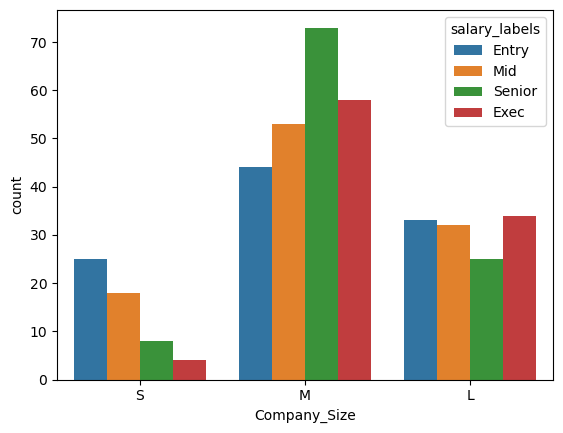

In [141]:
# Plot the count of salary levels at companies of different sizes
sns.countplot(data=salaries, x="Company_Size", hue="salary_labels")
plt.show()

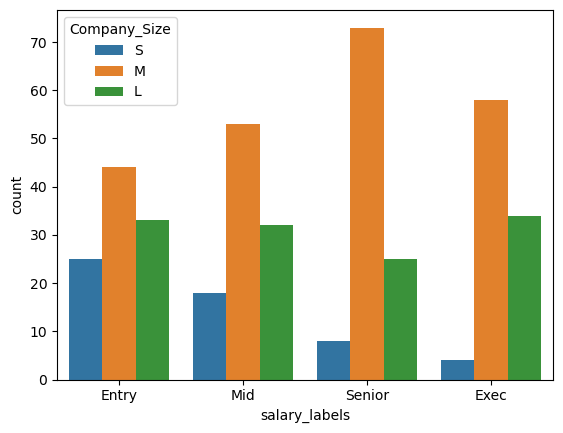

In [142]:
#By Levels
sns.countplot(data=salaries, x="salary_labels", hue="Company_Size")
plt.show()

### <font color=darkred>11.	Regarding comparing salaries, exploratory data analysis is a crucial step in generating hypotheses! You've had an idea you'd like to explore—do data professionals get paid more in the USA than they do in Great Britain? You'll need to subset the data by "Employee_Location" and produce a plot displaying the average salary between the two groups.</font>


### <font color=darkred>Filter salaries where "Employee_Location" is "US" or "GB", saving as usa_and_gb.</font>

In [148]:
# Filter for employees in the US or GB 
usa_and_gb = salaries[salaries["Employee_Location"].isin(["US", "GB"])]
usa_and_gb["Employee_Location"].value_counts()

Employee_Location
US    228
GB     29
Name: count, dtype: int64

### <font color=darkred>Use usa_and_gb to create a barplot visualizing  "Salary_USD" against "Employee_Location". </font>

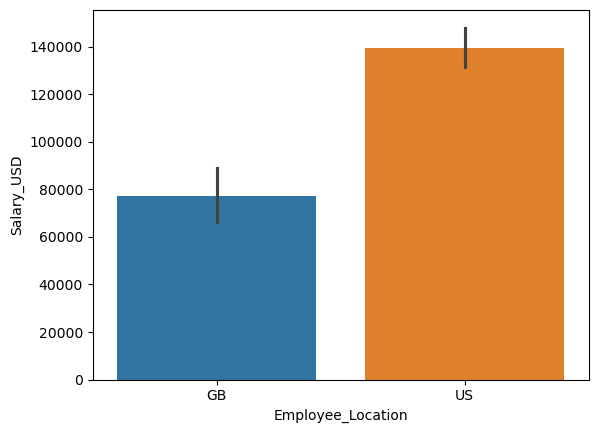

In [150]:
# Create a barplot of salaries by location
sns.barplot(data=usa_and_gb, y="Salary_USD", x="Employee_Location", hue="Employee_Location")
plt.show()


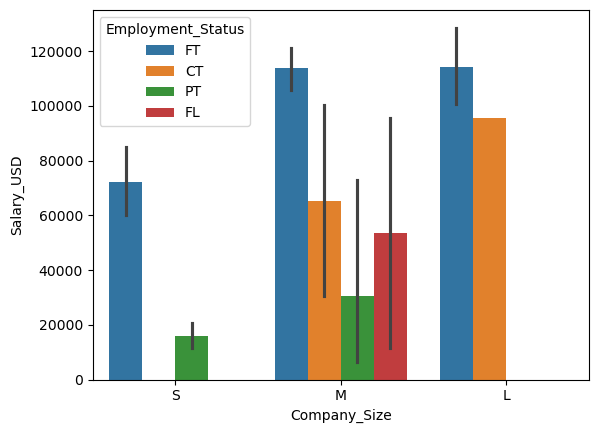

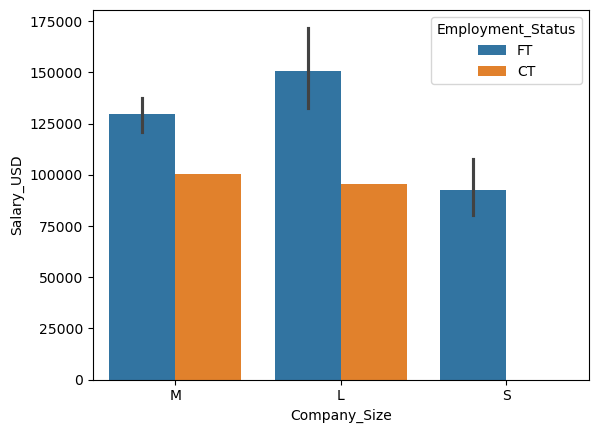

In [151]:
# Create a bar plot of salary versus company size, factoring in employment status
sns.barplot(data=salaries, y="Salary_USD", x="Company_Size", hue="Employment_Status")
plt.show()
sns.barplot(data=usa_and_gb, y="Salary_USD", x="Company_Size", hue="Employment_Status")
plt.show()

### <b>How can correlation help your business? </b>
### Correlation is widely used in real-life decision making. You will find correlation in Marketing, Finance, Sales, basically we could mention domains endlessly. 

### A few benefits:
### <b>Pattern recognition.</b> In the big data world looking at millions of rows of raw data will not tell you anything about the business. Using existing information for better decision making will be crucial in the future. It can reveal new business opportunities, give insights about existing processes, and help to communicate clearly. Recognizing patterns is one of the main goals of data science and correlation analysis can help with that.
### <b>Financial decision making </b>– investment decisions. Diversifying is essential. Investing in negatively correlated sectors can help you mitigate risk. 
### For example: if the airline industry is negatively correlated with the social media industry, the investor may choose to invest in a social media stock. If a negative event affects one of those industries, the other sector will be a safer place for the money [11]
### <b>Projections.</b> If a company finds a positive correlation between two variables and has some predictions on the one variable involved in the correlation then they can try to make predictions on the second variable as well.
### For example: Company X finds a positive correlation between the number of tourists in city Y and its sales. A 10% rise in visitors for the coming year is predicted in city Y. Company X can anticipate an increase in sales as well. Of course, when it gets to predictions, one should always consider the above-mentioned correlation-causation issue.
